In [288]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [289]:
df = pd.read_csv('/content/survey(in).csv')

In [290]:
pd.set_option('display.max_columns', None)

In [291]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [292]:
df.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,9/12/2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,9/26/2015 1:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,11/7/2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,11/30/2015 21:25,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2/1/2016 23:04,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,No,No,Yes,Yes,No,No,Yes,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [293]:
df.shape

(1259, 27)

In [294]:
df.columns = df.columns.str.strip().str.lower()

In [295]:
df.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [296]:
df.dtypes

,0
timestamp,object
age,int64
gender,object
country,object
state,object
self_employed,object
family_history,object
treatment,object
work_interfere,object
no_employees,object


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  1259 non-null   object
 1   age                        1259 non-null   int64 
 2   gender                     1259 non-null   object
 3   country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [298]:
df.describe()

,age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


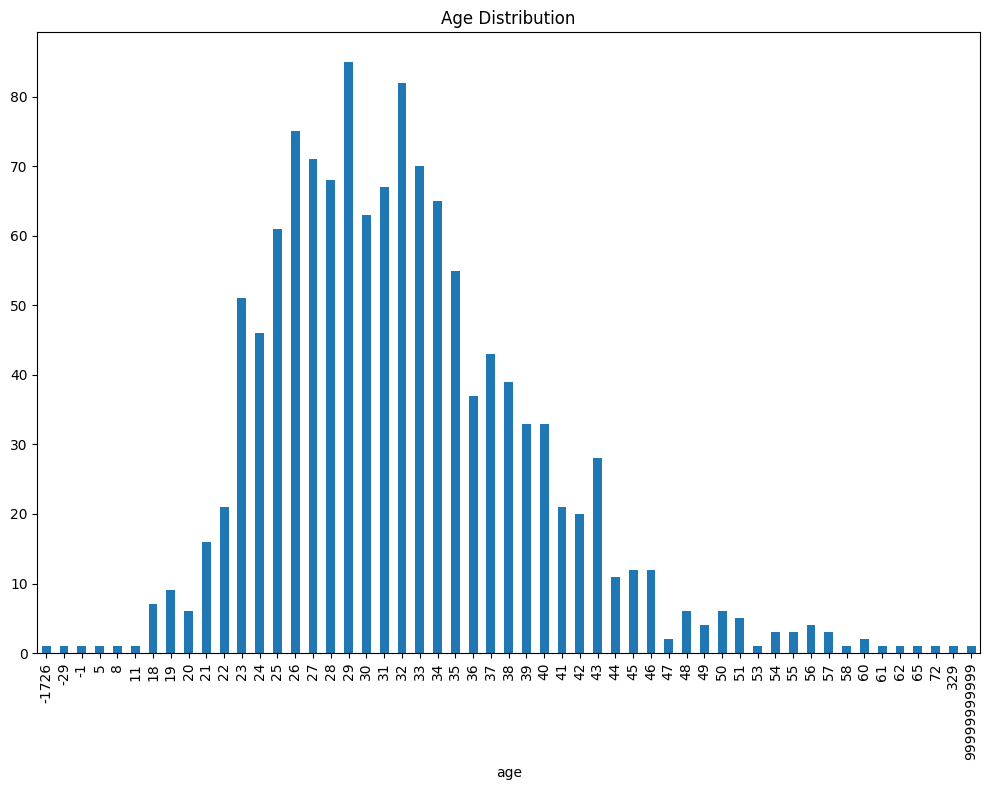

In [299]:
plt.figure(figsize=(10, 8))
df['age'].value_counts().sort_index().plot(kind='bar')

plt.title('Age Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [300]:
df.drop(df[(df['age'] > 65) | (df['age'] < 18)].index, inplace=True)

In [301]:
df.describe(exclude='number')

,timestamp,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1250,1250,1250,737,1232,1250,1250,988,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,161
unique,880,46,46,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,157
top,8/27/2014 12:31,Male,United States,CA,No,No,Yes,Sometimes,25-Jun,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,8,612,745,138,1090,762,631,464,289,880,1025,472,499,837,641,814,561,487,920,770,511,1002,555,573,1070,5


In [302]:
df.isnull().sum()

,0
timestamp,0
age,0
gender,0
country,0
state,513
self_employed,18
family_history,0
treatment,0
work_interfere,262
no_employees,0


In [303]:
df.drop(columns=['timestamp', 'country', 'state', 'comments'], inplace=True)

In [304]:
df.isnull().sum()

,0
age,0
gender,0
self_employed,18
family_history,0
treatment,0
work_interfere,262
no_employees,0
remote_work,0
tech_company,0
benefits,0


In [305]:
df['self_employed'].value_counts()

,count
self_employed,
No,1090
Yes,142


In [306]:
df['self_employed'].mode()[0]


'No'

In [307]:
df['self_employed'].fillna('No', inplace=True)

In [308]:
df['work_interfere'].value_counts()

,count
work_interfere,
Sometimes,464
Never,211
Rarely,173
Often,140


In [309]:
df['work_interfere'].fillna('Dontknow', inplace=True)

In [310]:
df.isnull().sum()

,0
age,0
gender,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0
remote_work,0
tech_company,0
benefits,0


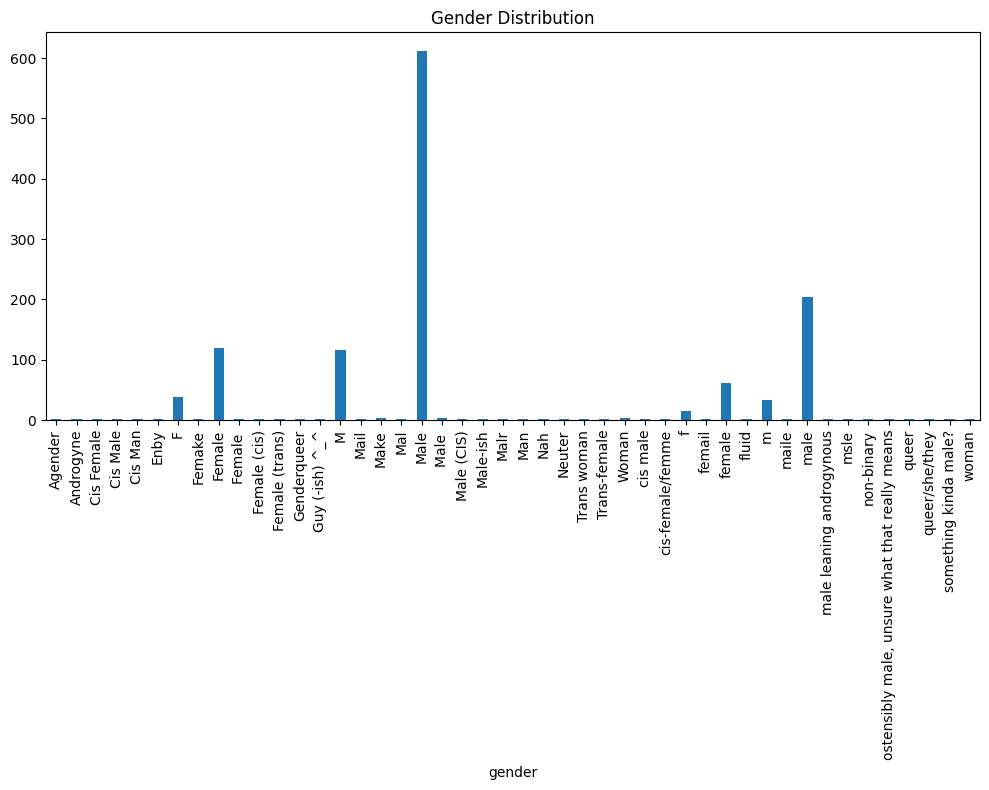

In [311]:
plt.figure(figsize=(10, 8))
df['gender'].value_counts().sort_index().plot(kind='bar')

plt.title('Gender Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [312]:
def clean_gender(g):
    g = str(g).strip().lower()

    if g in ['male', 'm', 'male-ish', 'maile', 'cis male', 'cis man', 'man', 'msle',
             'mal', 'male (cis)', 'make',  'mail', 'malr']:
        return 'Male'
    elif g in ['female', 'f', 'cis female', 'woman', 'femake', 'female ', 'female (cis)',
                'femail', 'cis-female/femme']:
        return 'Female'
    else:
        return 'Other'

df['gender'] = df['gender'].apply(clean_gender)


In [313]:
print(df['gender'].value_counts())

gender
Male      986
Female    246
Other      18
Name: count, dtype: int64


In [314]:
categoricalCols = [
    'gender', 'self_employed', 'family_history', 'work_interfere',
    'no_employees', 'remote_work', 'tech_company', 'benefits',
    'care_options', 'wellness_program', 'seek_help', 'anonymity',
    'leave', 'mental_health_consequence', 'phys_health_consequence',
    'coworkers', 'supervisor', 'mental_health_interview',
    'phys_health_interview', 'mental_vs_physical', 'obs_consequence'
]

In [315]:
for column in categoricalCols:
    print(f"\nUnique values in '{column}':")
    print(df[column].unique())


Unique values in 'gender':
['Female' 'Male' 'Other']

Unique values in 'self_employed':
['No' 'Yes']

Unique values in 'family_history':
['No' 'Yes']

Unique values in 'work_interfere':
['Often' 'Rarely' 'Never' 'Sometimes' 'Dontknow']

Unique values in 'no_employees':
['25-Jun' 'More than 1000' '26-100' '100-500' '5-Jan' '500-1000']

Unique values in 'remote_work':
['No' 'Yes']

Unique values in 'tech_company':
['Yes' 'No']

Unique values in 'benefits':
['Yes' "Don't know" 'No']

Unique values in 'care_options':
['Not sure' 'No' 'Yes']

Unique values in 'wellness_program':
['No' "Don't know" 'Yes']

Unique values in 'seek_help':
['Yes' "Don't know" 'No']

Unique values in 'anonymity':
['Yes' "Don't know" 'No']

Unique values in 'leave':
['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']

Unique values in 'mental_health_consequence':
['No' 'Maybe' 'Yes']

Unique values in 'phys_health_consequence':
['No' 'Yes' 'Maybe']

Unique values in 'coworkers':
['So

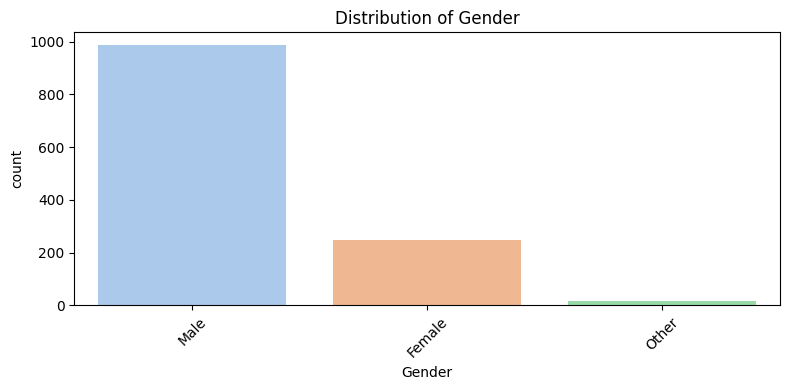

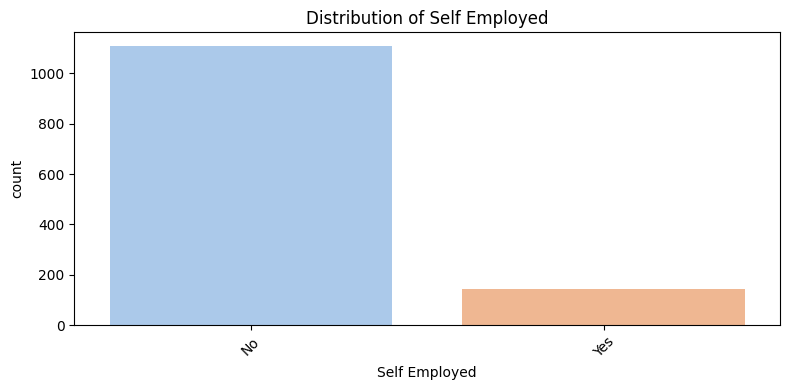

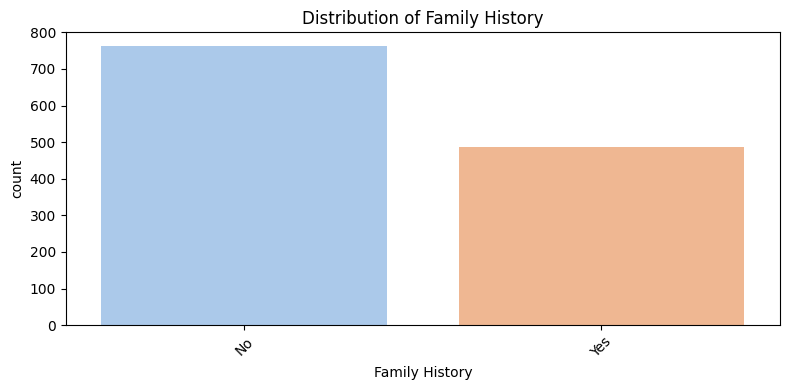

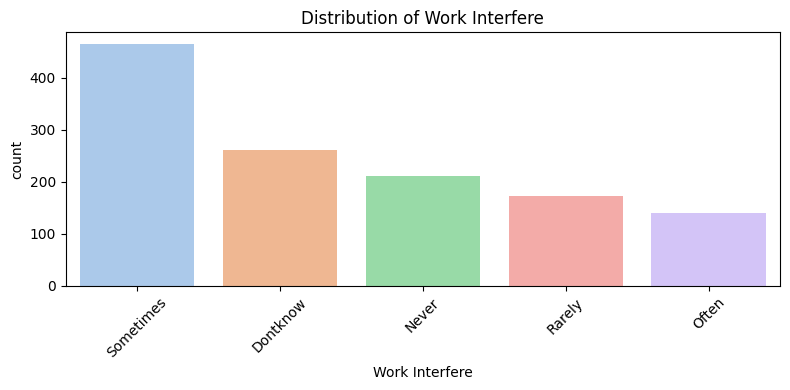

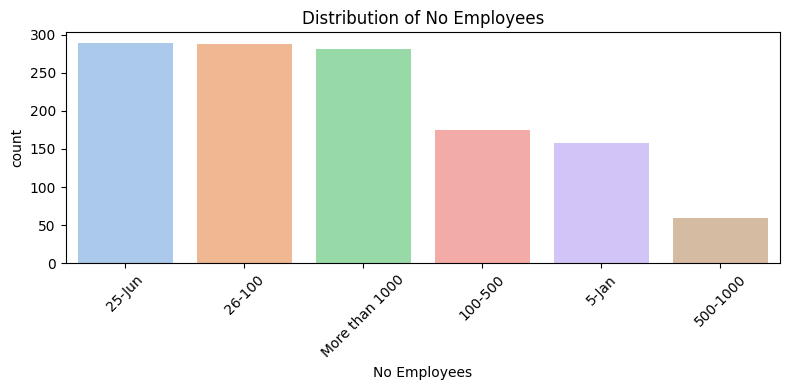

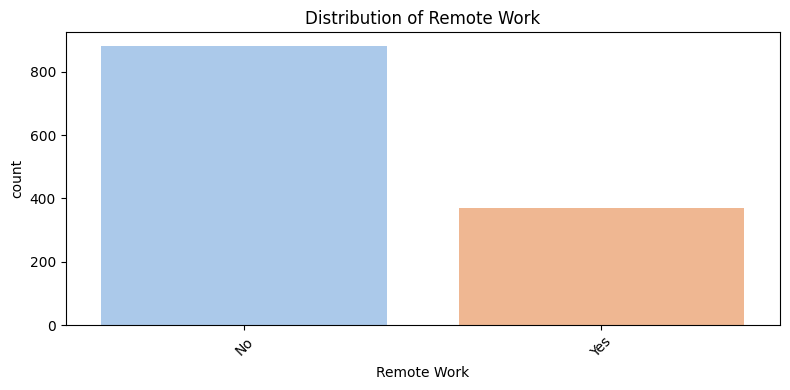

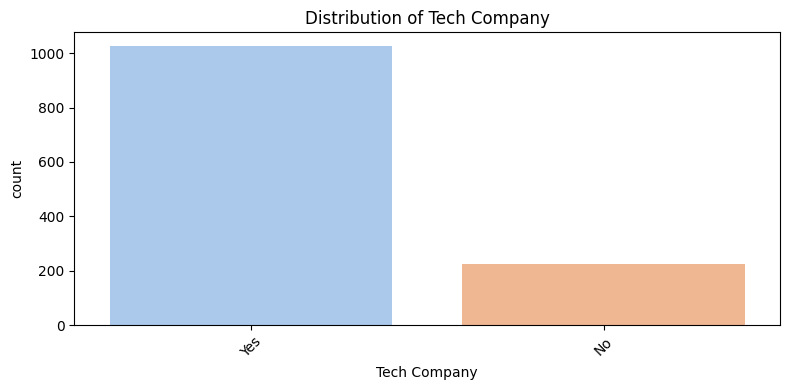

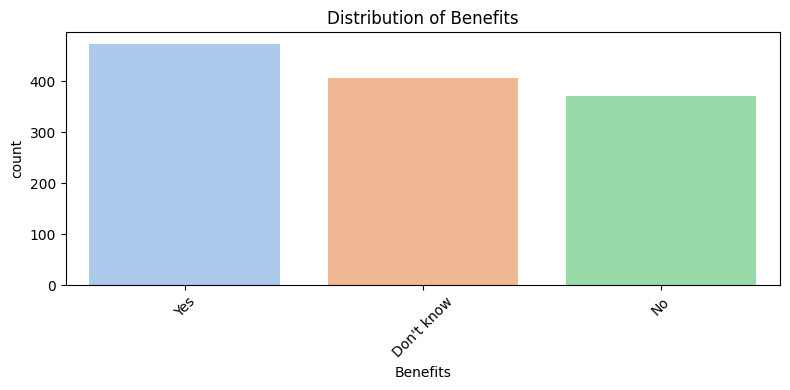

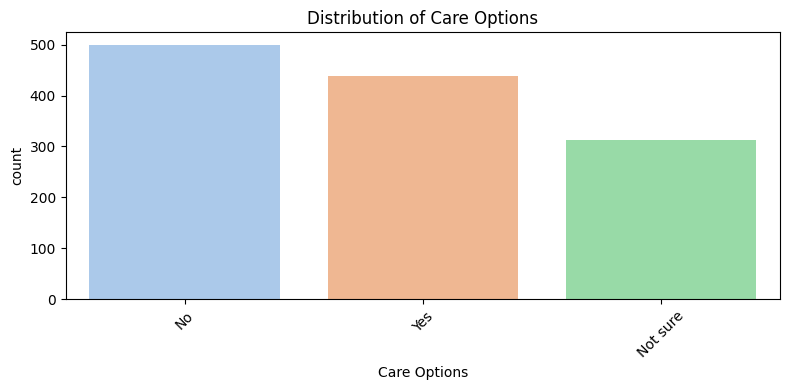

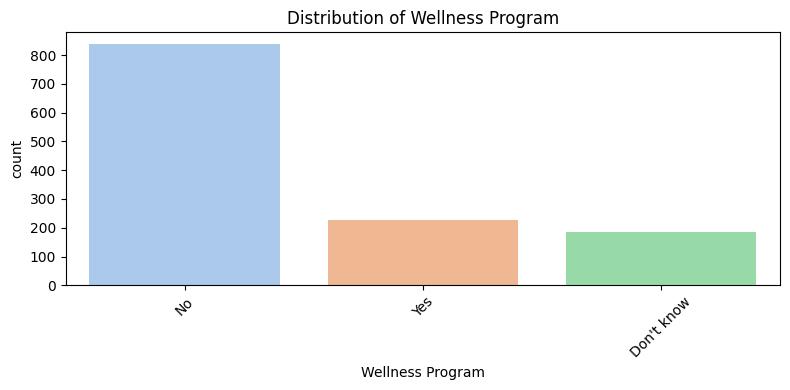

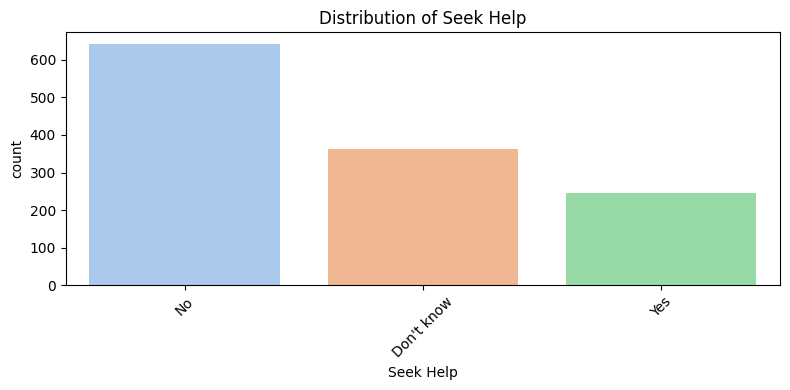

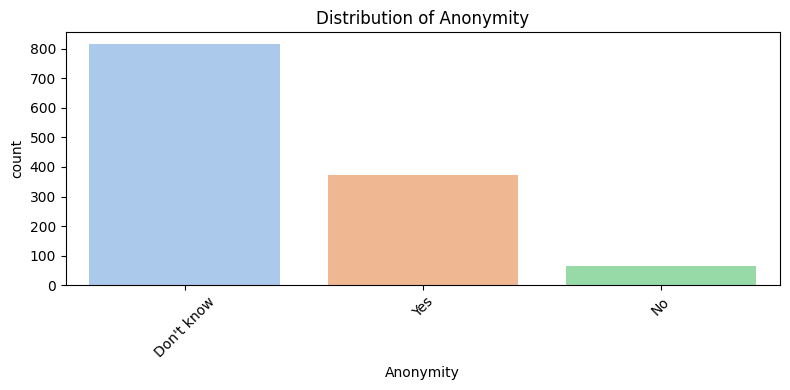

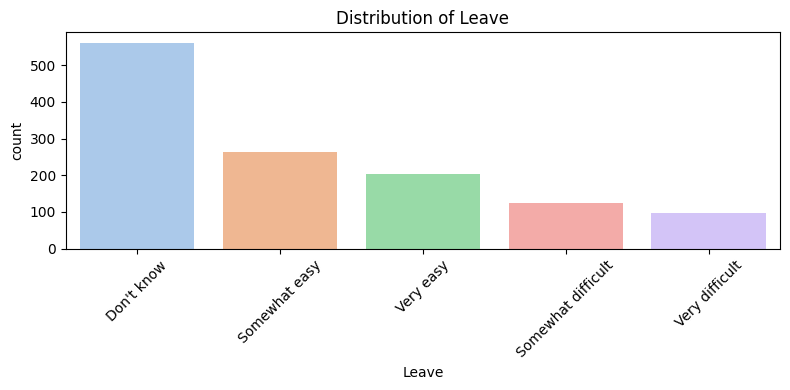

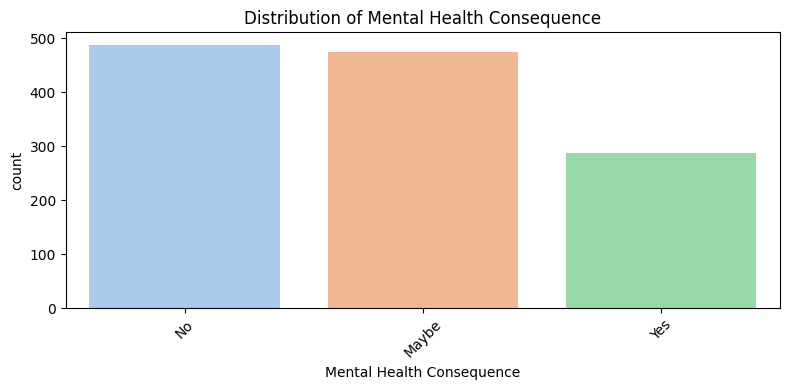

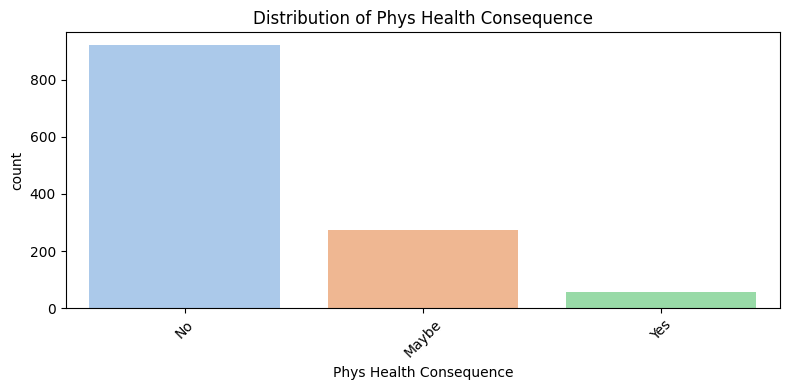

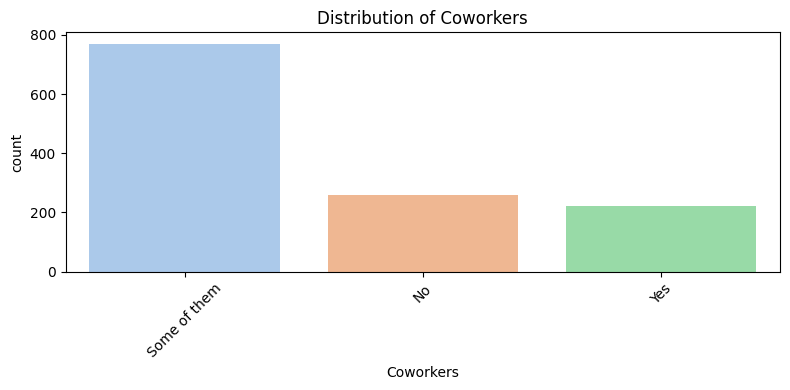

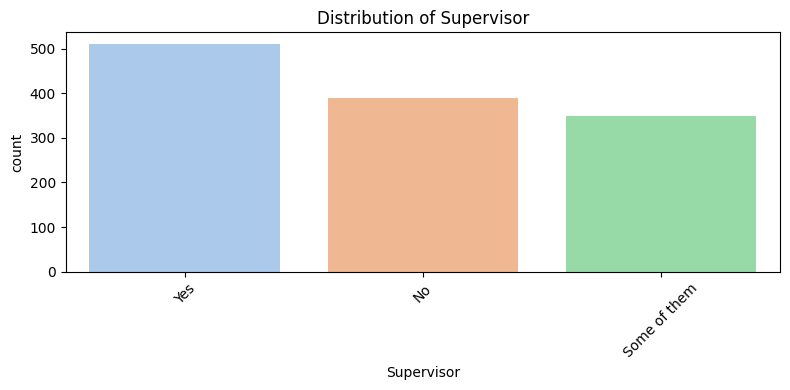

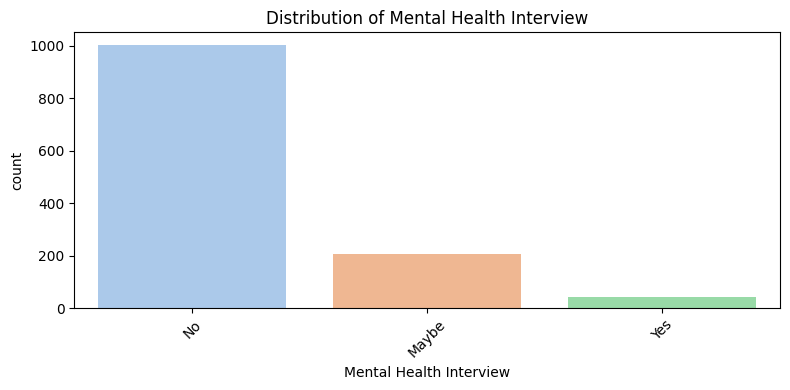

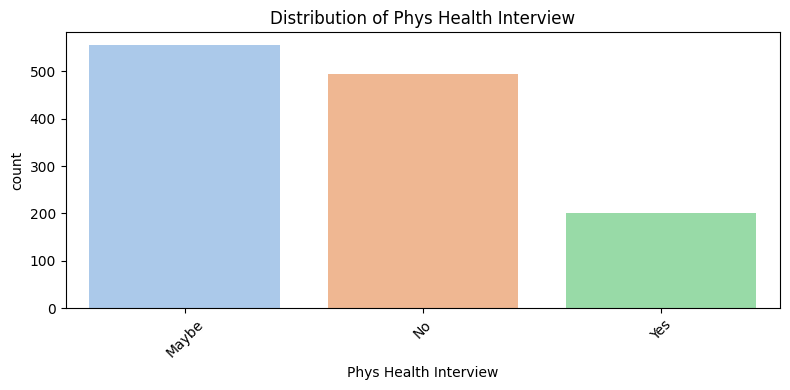

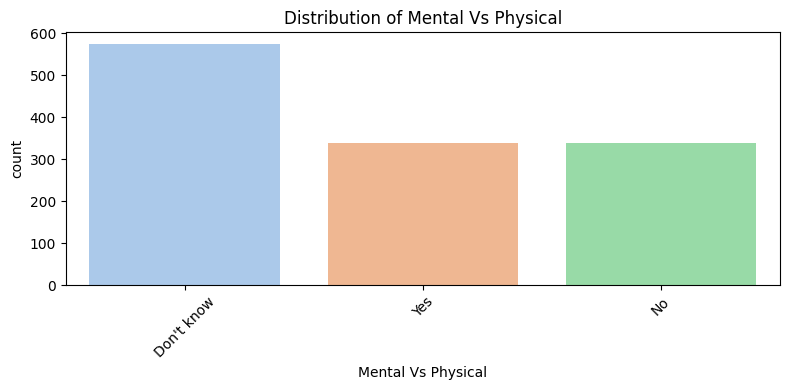

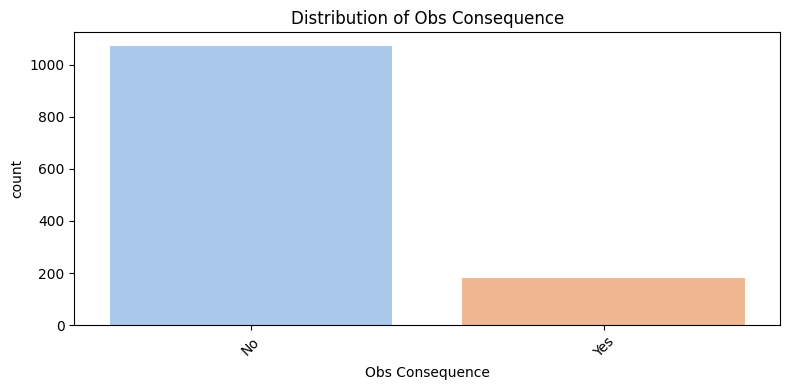

In [316]:
for col in categoricalCols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index[:6])
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


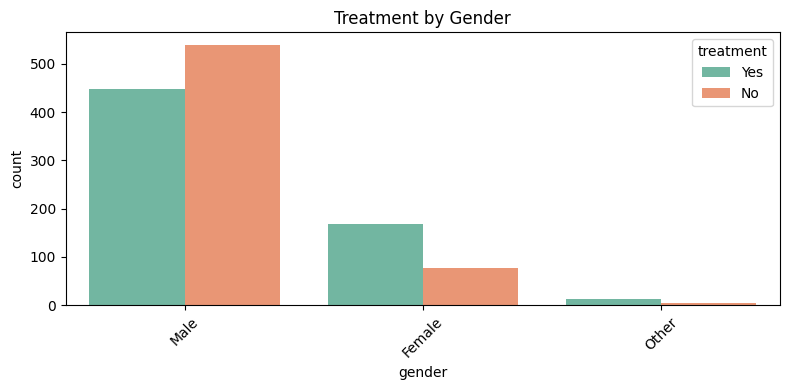

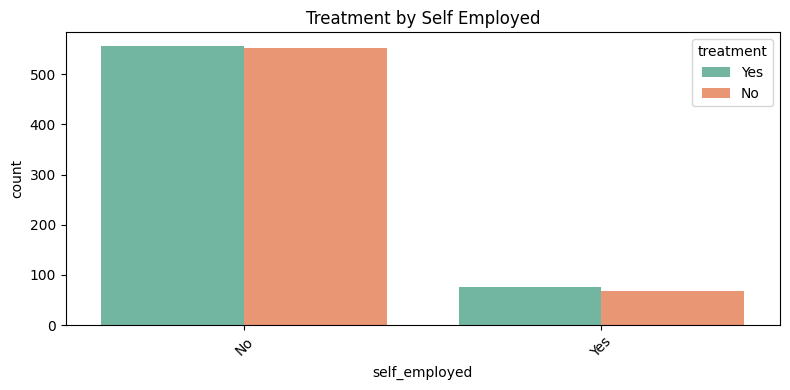

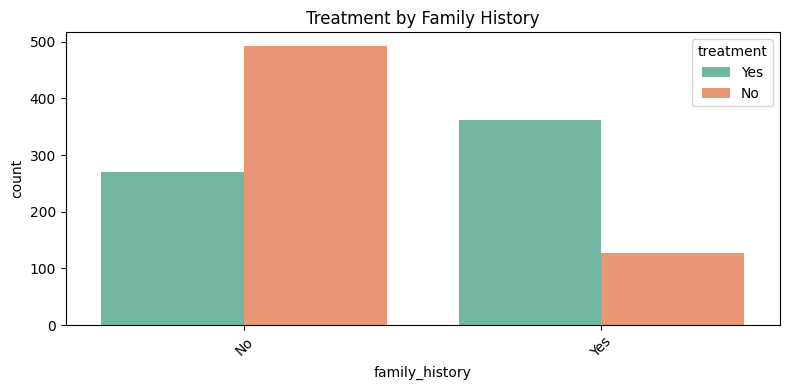

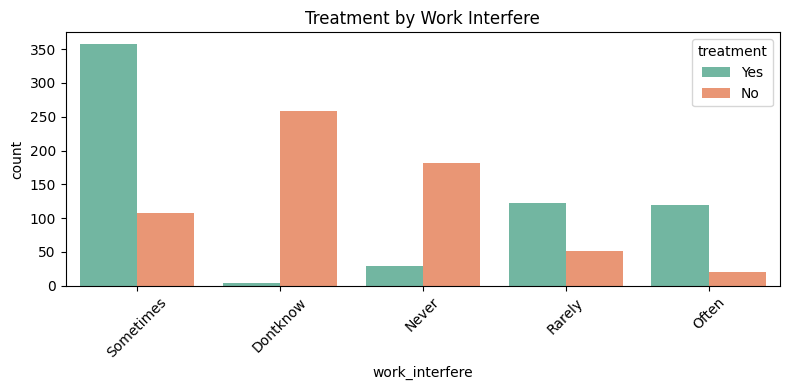

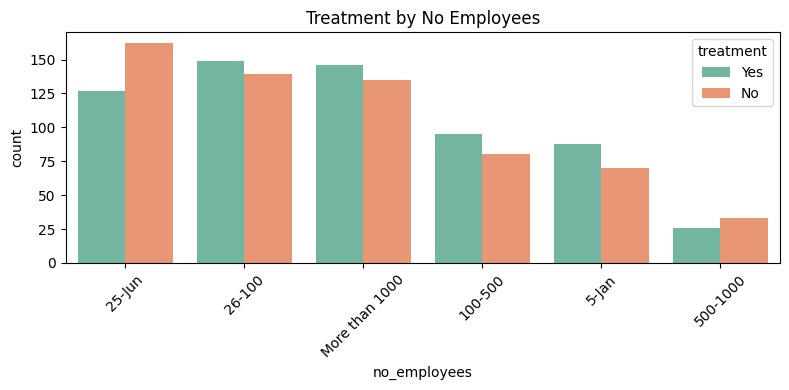

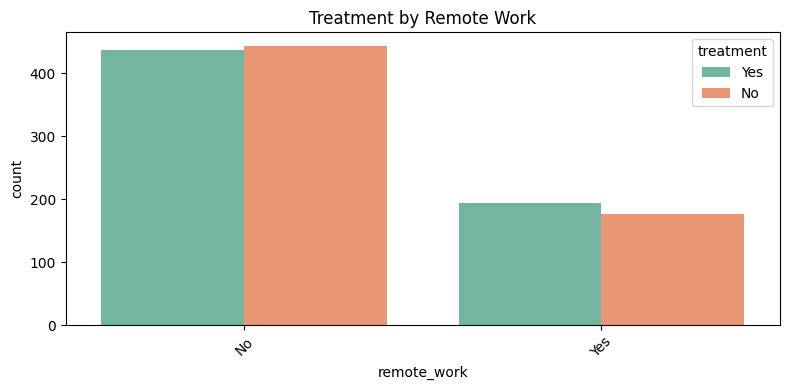

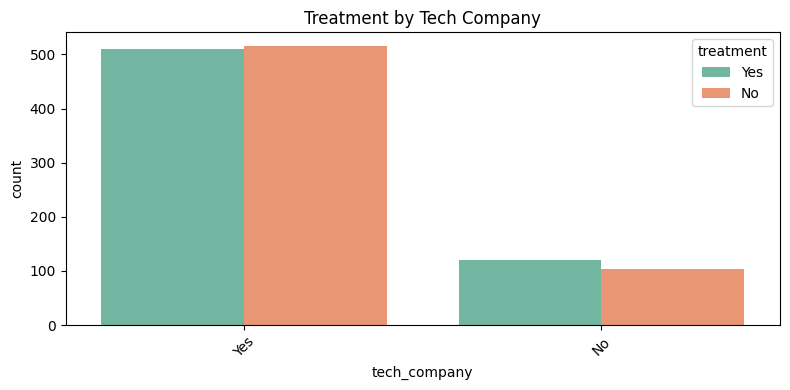

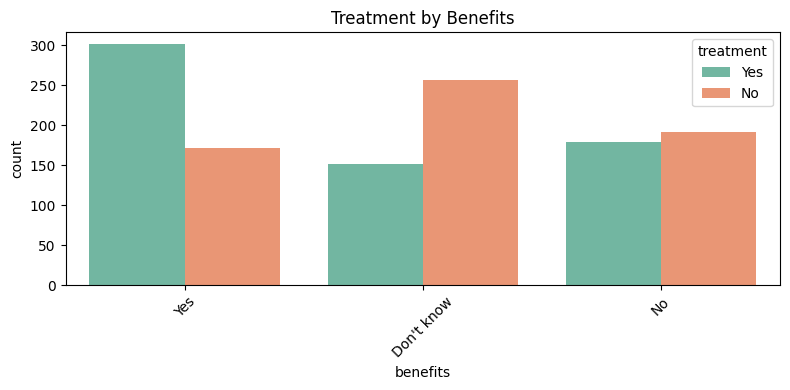

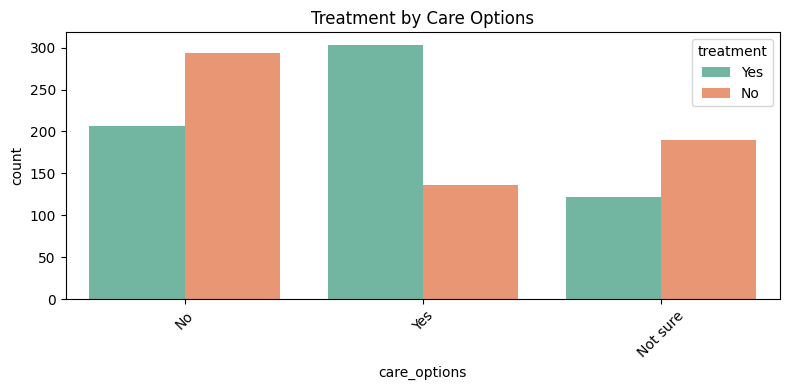

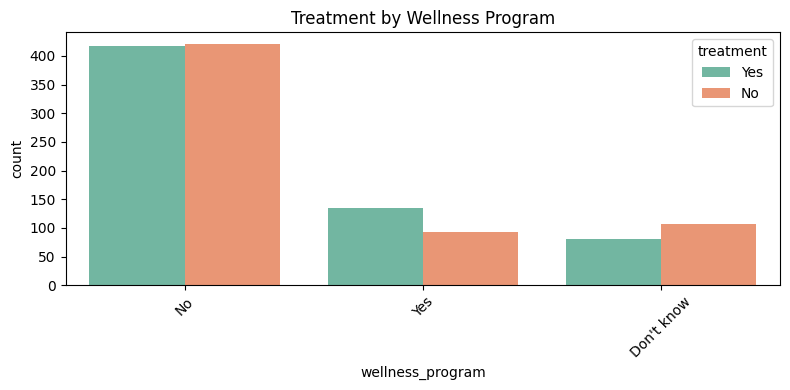

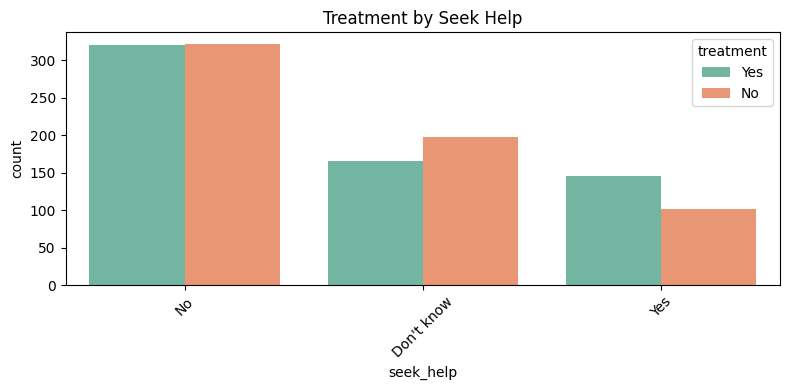

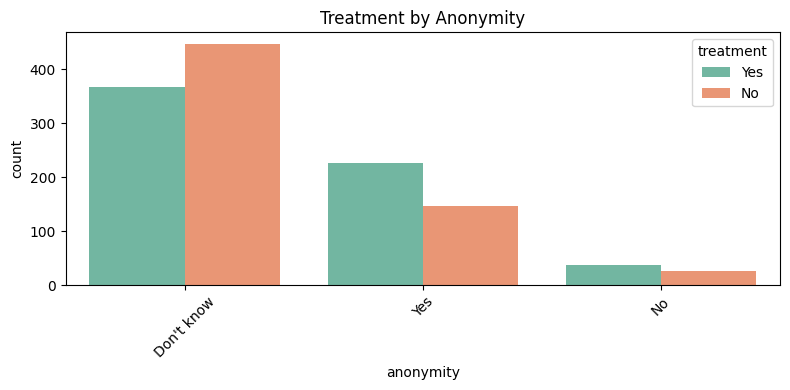

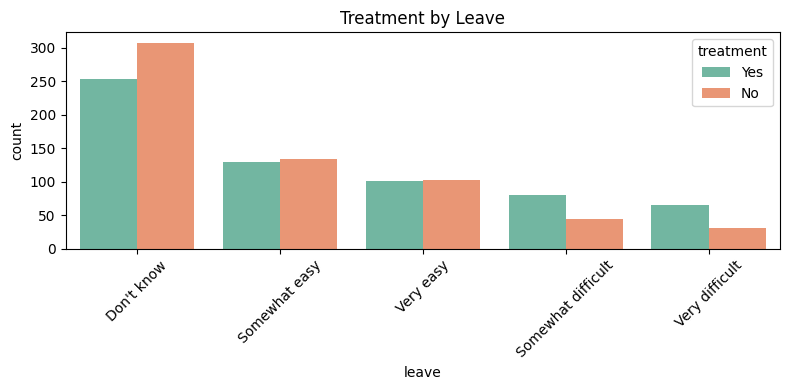

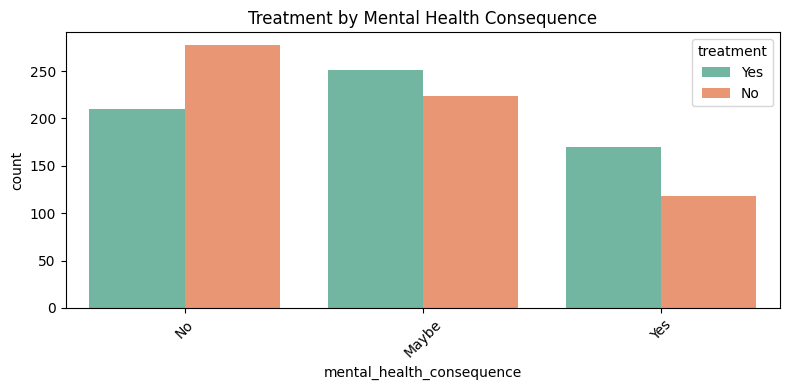

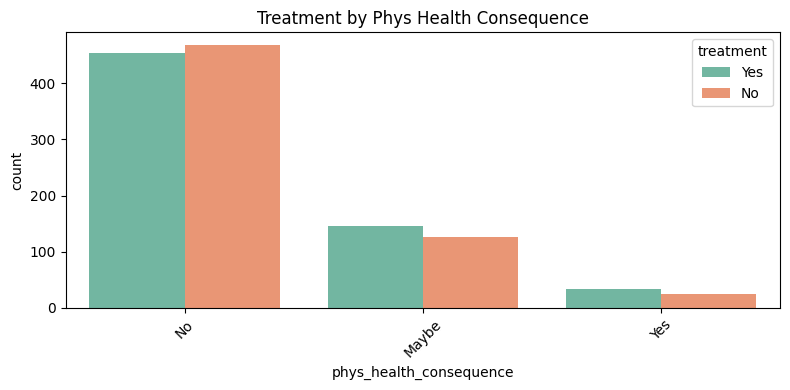

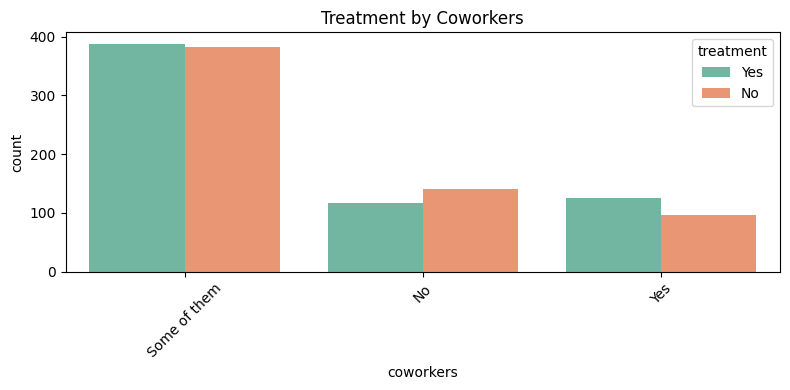

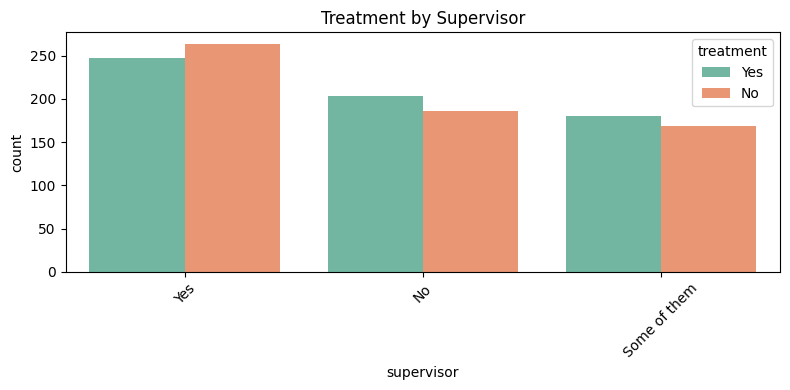

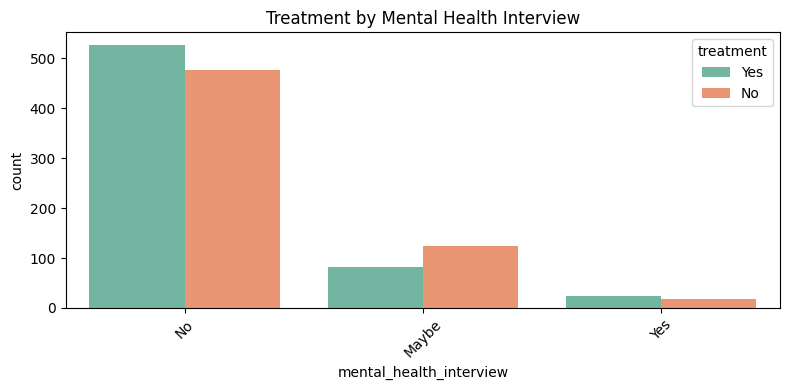

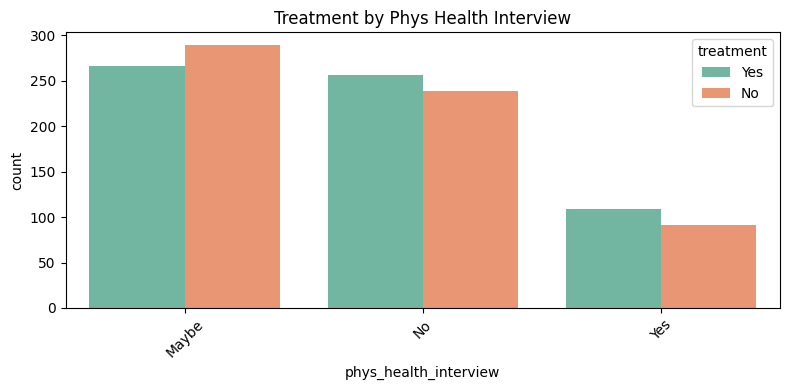

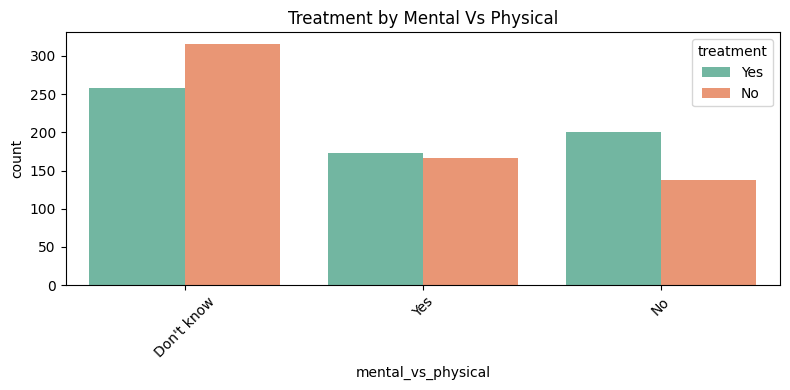

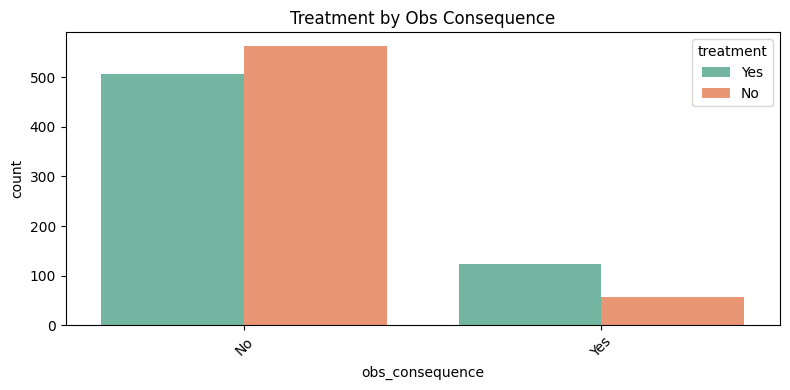

In [317]:
for col in categoricalCols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='treatment', palette='Set2', order=df[col].value_counts().index[:6])
    plt.title(f'Treatment by {col.replace("_", " ").title()}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [318]:
# Gender
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

# Self Employed
df['self_employed'] = df['self_employed'].map({'No': 0, 'Yes': 1})

# Family History
df['family_history'] = df['family_history'].map({'No': 0, 'Yes': 1})

# Work Interfere
df['work_interfere'] = df['work_interfere'].map({
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3,
    'Dontknow': 4
})

# No Employees
df['no_employees'] = df['no_employees'].map({
    '5-Jan': 0,
    '25-Jun': 1,
    '26-100': 2,
    '100-500': 3,
    '500-1000': 4,
    'More than 1000': 5
})

# Remote Work
df['remote_work'] = df['remote_work'].map({'No': 0, 'Yes': 1})

# Tech Company
df['tech_company'] = df['tech_company'].map({'No': 0, 'Yes': 1})

# Benefits
df['benefits'] = df['benefits'].map({'No': 0, "Don't know": 1, 'Yes': 2})

# Care Options
df['care_options'] = df['care_options'].map({'No': 0, 'Not sure': 1, 'Yes': 2})

# Wellness Program
df['wellness_program'] = df['wellness_program'].map({'No': 0, "Don't know": 1, 'Yes': 2})

# Seek Help
df['seek_help'] = df['seek_help'].map({'No': 0, "Don't know": 1, 'Yes': 2})

# Anonymity
df['anonymity'] = df['anonymity'].map({'No': 0, "Don't know": 1, 'Yes': 2})

# Leave
df['leave'] = df['leave'].map({
    'Very easy': 0,
    'Somewhat easy': 1,
    "Don't know": 2,
    'Somewhat difficult': 3,
    'Very difficult': 4
})

# Mental Health Consequence
df['mental_health_consequence'] = df['mental_health_consequence'].map({
    'No': 0,
    'Maybe': 1,
    'Yes': 2
})

# Physical Health Consequence
df['phys_health_consequence'] = df['phys_health_consequence'].map({
    'No': 0,
    'Maybe': 1,
    'Yes': 2
})

# Coworkers
df['coworkers'] = df['coworkers'].map({
    'No': 0,
    'Some of them': 1,
    'Yes': 2
})

# Supervisor
df['supervisor'] = df['supervisor'].map({
    'No': 0,
    'Some of them': 1,
    'Yes': 2
})

# Mental Health Interview
df['mental_health_interview'] = df['mental_health_interview'].map({
    'No': 0,
    'Maybe': 1,
    'Yes': 2
})

# Physical Health Interview
df['phys_health_interview'] = df['phys_health_interview'].map({
    'No': 0,
    'Maybe': 1,
    'Yes': 2
})

# Mental vs Physical
df['mental_vs_physical'] = df['mental_vs_physical'].map({
    'No': 0,
    "Don't know": 1,
    'Yes': 2
})

# Observed Consequence
df['obs_consequence'] = df['obs_consequence'].map({'No': 0, 'Yes': 1})


In [319]:
df

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,1,0,0,Yes,3,1,0,1,2,1,0,2,2,1,0,0,1,2,0,1,2,0
1,44,0,0,0,No,1,5,0,0,1,0,1,1,1,2,1,0,0,0,0,0,1,0
2,32,0,0,0,No,1,1,0,1,0,0,0,0,1,3,0,0,2,2,2,2,0,0
3,31,0,0,1,Yes,3,2,0,1,0,2,0,0,0,3,2,2,1,0,1,1,0,1
4,31,0,0,0,No,0,3,1,1,2,0,1,1,1,2,0,0,1,2,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,0,0,0,Yes,4,2,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0
1255,32,0,0,1,Yes,3,2,1,1,2,2,0,0,2,3,0,0,1,2,0,0,2,0
1256,34,0,0,1,Yes,2,5,0,1,2,2,0,0,1,3,2,2,0,0,0,0,0,0
1257,46,1,0,0,No,4,3,1,1,0,2,0,0,1,2,2,0,0,0,0,0,0,0


In [320]:
df['treatment'].value_counts()

,count
treatment,
Yes,631
No,619


In [321]:
df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})

In [322]:
X = df.drop(columns=['treatment'])
y = df['treatment']

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [324]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [325]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
